In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

import openturns as ot

import otagrum as otagr

In [2]:
folder="data/winequality/"
#with open (f"{folder}/struct.txt", "r") as ff:
#    struct=ff.readlines()[0].strip()
#gum.fastBN(struct)

In [3]:
X = ot.Sample.ImportFromCSVFile(f"{folder}/winequality-red.csv")
alpha=0.1
conditionning = 3

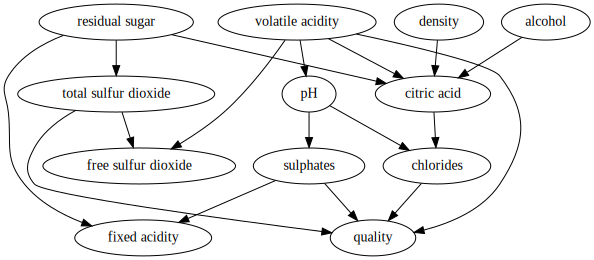

In [4]:
learner = otagr.ContinuousPC(X, conditionning, alpha)
learner.setVerbosity(True)
#learner.setOptimalPolicy(True)
#skel=learner.inferSkeleton()
#skel
dag = learner.learnDAG()
gnb.showDot(dag.toDot(),size="20")

In [5]:
t=otagr.ContinuousTTest(X)
t.setAlpha(alpha)

def petiteDemo(Y,Z,X):
    """
    Print some results just for fun
    """
    _,p,b=t.isIndep(Y,Z,[])
    if b:
        print(f"{Y} et {Z} sont indépendants ({100*p:5.3}%)")
    else:
        print(f"{Y} et {Z} ne sont pas indépendants ({100*p:5.3}%)")
    print(" alors que")
    
    _,p,b=t.isIndep(Y,Z,X)
    if t.isIndep(Y,Z,X)[2]:
        print(f"{Y} et {Z} sont indépendants sachant {X} ({100*p:5.3}%)")
    else:
        print(f"{Y} et {Z} ne sont pas indépendants sachant {X} ({100*p:5.3}%)")

In [6]:
print(X.getDescription())

[fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality]#12


In [7]:
petiteDemo(2,4,[3])

2 et 4 ne sont pas indépendants ( 0.57%)
 alors que
2 et 4 sont indépendants sachant [3] ( 72.1%)


In [8]:
petiteDemo(1,8,[2])

1 et 8 ne sont pas indépendants (3.64e-05%)
 alors que
1 et 8 sont indépendants sachant [2] ( 72.1%)


In [9]:
petiteDemo(2,11,[7])

2 et 11 ne sont pas indépendants (6.02e-104%)
 alors que
2 et 11 sont indépendants sachant [7] ( 72.1%)
